# Overview

Our goal is to examine the **effects of several socio-economic factors** on the **grades of secondary school students**. These analyses will allow us to predict student performance based upon a variety of features like study hours, alcohol consumption, parent's education, etc.

We will run some interesting analysis like -
1. Effect of Alcohol consumption on Student performance.
2. Does being in a relationship affect high school student performance?
3. Impact of a parent's education on student grades. This can be very useful as a lot of schools use parent’s education as a criteria for admission. This analysis can present an argument either in favor or against this approach.

Finally, we will create various machine learning models to predict student's final performance and then compare these models using a set of accuracy metrics.

We will be using the **[CRISP-DM](https://thinkinsights.net/data-literacy/crisp-dm/)** data scoemce process for this project.

# Business Understanding

Our initial focus will be on understanding whether **alcohol consumption** can have an **impact on student performance** or not.  In United States, one in four individuals between the ages of 12 and 20 reported binge drinking alcohol on a monthly basis ([source](https://www.niaaa.nih.gov/publications/brochures-and-fact-sheets/underage-drinking)). Underage drinking has become a very serious health concern and binge drinking by young people poses enormous health and safety risks.

There has been a steady rise in the number of teenagers found driving under the influence and this behaviour often leads to serious accidents resulting in property damage, injuries, and sometimes death as well ([source](https://drugfree.org/drug-and-alcohol-news/23-of-teens-surveyed-admit-to-driving-under-influence-of-alcohol-or-drugs/)). Thus, it is critical that we implement prevention strategies during early adolescence to prevent escalation in alcohol consumption.

We will run similar analyses for multiple factors.  Based upon our observations, we will try to build a **persona of a model student** who has the highest chance of academic success.

This information can then be used by school districts, academic counsellors, and parents to help guide their students towards better school performance.

# Data Understanding

We will use the [UCI Machine Learning Repository: Student Performance Data Set](http://archive.ics.uci.edu/ml/datasets/Student+Performance) to present interesting insights about the factors that predict student performance.

> Source:
  P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In
  A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference
  (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
  Available at: [Web Link](www3.dsi.uminho.pt/pcortez/student.pdf).

This data contains student achievement information in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics(`student-mat.csv`) and Portuguese language(`student-por.csv`).

In [Cortez and Silva, 2008](www3.dsi.uminho.pt/pcortez/student.pdf), the two datasets were modeled under binary/five-level classification and regression tasks.

## Import Libraries

In [ ]:
# Data handling
import numpy as np
import pandas as pd

# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools

# Statistical tests
import statsmodels.api as sm
import scipy

# Standard ML Models for comparison
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb

# Sklearn utilities
from sklearn.model_selection import (
    cross_val_predict,
    KFold,
    cross_val_score,
    GridSearchCV,
    train_test_split,
    RandomizedSearchCV,
)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
from sklearn.preprocessing import MinMaxScaler


# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Preparation

In [ ]:
# load datasets for two subjects, Math and Portuguese
mat_df = pd.read_csv("data/student-mat.csv", sep=';')
por_df = pd.read_csv("data/student-por.csv", sep=';')

Let's take a look at both the datasets

In [ ]:
# students studying portugese
por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
por_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

**Observations**:
* There are no missing values in the dataset containing info about students studying portugese
* All the data types seem okay and don't need any explicit cleaning. We will dive further into the columns during EDA.


In [ ]:
# students studying mathematics
mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

**Observations:**
- While portugese has a total of 649 students, mathematics has 395 students. Both datasets have the same columns.
- No null values in this dataset as well.

Now, we will merge both the datasets together.

In [ ]:
# Merging both the dataframes using concatenation
student_df = pd.concat([mat_df,por_df],ignore_index=True)
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
print('Total number of students:',len(student_df))

Total number of students: 1044


Let's rename some of the columns to make the dataset unambiguous.

In [ ]:
student_df.columns = [
    "school",
    "sex",
    "age",
    "address",
    "family_size",
    "parents_status",
    "mother_education",
    "father_education",
    "mother_job",
    "father_job",
    "reason",
    "guardian",
    "commute_time",
    "study_time",
    "failures",
    "school_support",
    "family_support",
    "paid_classes",
    "activities",
    "nursery",
    "desire_higher_edu",
    "internet",
    "romantic",
    "family_quality",
    "free_time",
    "go_out",
    "weekday_alcohol_usage",
    "weekend_alcohol_usage",
    "health",
    "absences",
    "period1_score",
    "period2_score",
    "final_score",
]


In [ ]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   school                 1044 non-null   object
 1   sex                    1044 non-null   object
 2   age                    1044 non-null   int64 
 3   address                1044 non-null   object
 4   family_size            1044 non-null   object
 5   parents_status         1044 non-null   object
 6   mother_education       1044 non-null   int64 
 7   father_education       1044 non-null   int64 
 8   mother_job             1044 non-null   object
 9   father_job             1044 non-null   object
 10  reason                 1044 non-null   object
 11  guardian               1044 non-null   object
 12  commute_time           1044 non-null   int64 
 13  study_time             1044 non-null   int64 
 14  failures               1044 non-null   int64 
 15  school_support       

In [ ]:
# look for missing values
student_df.isnull().sum()

school                   0
sex                      0
age                      0
address                  0
family_size              0
parents_status           0
mother_education         0
father_education         0
mother_job               0
father_job               0
reason                   0
guardian                 0
commute_time             0
study_time               0
failures                 0
school_support           0
family_support           0
paid_classes             0
activities               0
nursery                  0
desire_higher_edu        0
internet                 0
romantic                 0
family_quality           0
free_time                0
go_out                   0
weekday_alcohol_usage    0
weekend_alcohol_usage    0
health                   0
absences                 0
period1_score            0
period2_score            0
final_score              0
dtype: int64

**Observations:**
* No null values in the dataset.
* Our target variable is the `final_score` column.

Our dataset is now ready for analysis. Our target variable is `final_score` and we have a total of 32 features.

As the data comes from a study, it is relatively clean and does not require extensive cleaning procedures. We will however need to perform formating options to get the data ready for machine learning.

We will look at them later on.

# Exploratory Data Analysis (EDA)

## Target Variable (final_score)

In [ ]:
# general statistics
student_df['final_score'].describe()

count    1044.000000
mean       11.341954
std         3.864796
min         0.000000
25%        10.000000
50%        11.000000
75%        14.000000
max        20.000000
Name: final_score, dtype: float64

So, the grade lies between 0 and 20. The average grade is roughly 56% at 11.34. Let's look at the distribution of grades to find more information

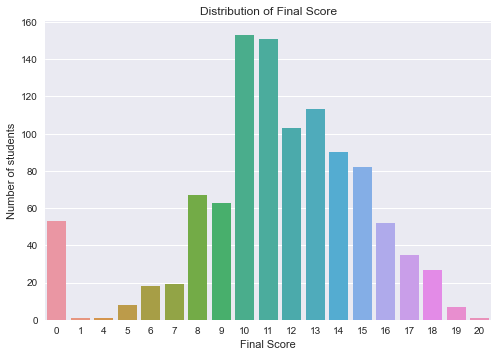

In [ ]:
# final score distribution
tmp_plt = sns.countplot(x = 'final_score', data = student_df)
tmp_plt.axes.set_title('Distribution of Final Score')
tmp_plt.set_xlabel('Final Score')
tmp_plt.set_ylabel('Number of students')
plt.savefig('final_score.jpg')
plt.show()

Overall, the distribution looks like a normal distribution which is ideal.

But, there are a lot of students that score 0 in the final grade. This is intriguing. We can expect some zero values but definitely not so many.

In [ ]:
print('Number of students that scored 0:',len(student_df[student_df['final_score']==0]))

Number of students that scored 0: 53


Reading the [source paper](www3.dsi.uminho.pt/pcortez/student.pdf), we realized that this can be due to multiple reasons:
1. Student actually scored a zero on the exam
2. Student dropped out of school before the exam
3. School barred the student from taking the exam

Let's try and analyze this further. Who has a higher chance of scoring a zero - male or a female.

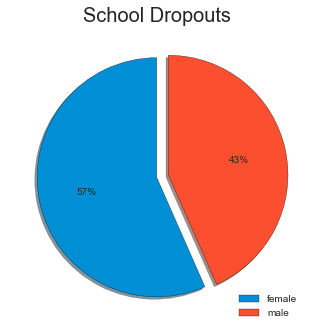

In [ ]:
# Draw Pie-Chart of frequency distribution for internet access
plt.style.use('seaborn')
total_dropout = student_df[student_df['final_score']==0]['sex'].value_counts().to_frame().T
labels = 'female', 'male'
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
explode2 = (0.2, 0)
plt.tight_layout()
plt.pie(total_dropout.iloc[0], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
plt.legend(loc='best', labels=labels, fontsize='medium')
plt.title('School Dropouts',fontsize = 20)
plt.savefig('female_school_dropout.jpg')
plt.show()

This is weird. More females are scoring 0 vs males. Usually females have better performance, then why are more females scoring 0 in their final exams. These must be dropouts. But what exactly is causing these females to drop out of high school?

Let's look at the relationship status of the females that are dropping out of school.

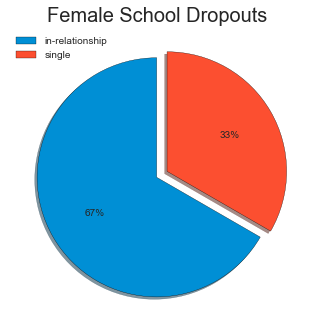

In [ ]:
# Draw Pie-Chart of frequency distribution of relationship status of females dropping out of school
plt.style.use('seaborn')
total_dropout = student_df[(student_df['final_score']==0)&(student_df['sex']=='F')]['romantic'].value_counts().to_frame().T
labels = 'in-relationship', 'single'
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
explode2 = (0.2, 0)
plt.tight_layout()
plt.pie(total_dropout.iloc[0], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
plt.legend(loc='best', labels=labels, fontsize='medium')
plt.title('Female School Dropouts',fontsize = 20)
plt.show()

There are many [reports](https://www.caf.com/en/knowledge/views/2021/01/teen-pregnancy-as-a-cause-of-school-dropout/) that suggest that as many as 36% of high-school dropouts can be attributed to teen pregnancy!

Having multiple reasons for a 0 final score might complicate things for us and we will consider removing these values before creating our machine learning models.

## Gender

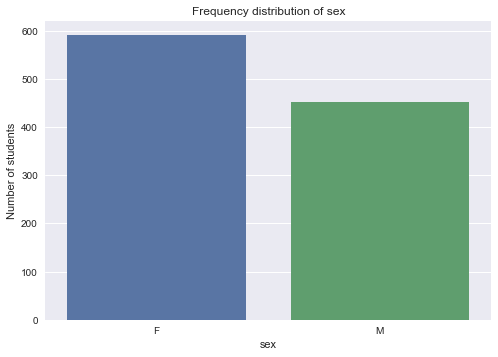

In [ ]:
tmp_plt = sns.countplot(x="sex", data=student_df)
tmp_plt.axes.set_title('Frequency distribution of sex')
tmp_plt.set_xlabel('sex')
tmp_plt.set_ylabel('Number of students')
plt.show()

There are a higher number of females in the dataset. Let's see if gender has any relationship with academic success.

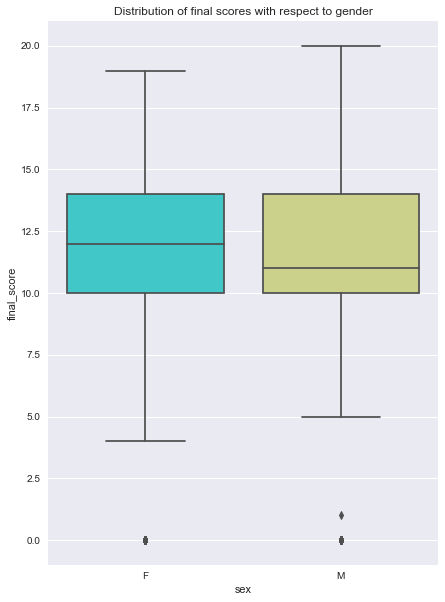

In [ ]:
plt.figure(figsize=(7,10))
plt.title("Distribution of final scores with respect to gender")
sns.boxplot(y="final_score", x="sex", data = student_df, palette = 'rainbow');

From the graph, we can see that the overall distribution of scores is very similar for both the genders. The median final score is slightly lower for males than females.

In [ ]:
print('Median final score for males:',student_df[student_df['sex']=='M']['final_score'].median())
print('Median final score for females:',student_df[student_df['sex']=='F']['final_score'].median())

Median final score for males: 11.0
Median final score for females: 12.0


Let's see if this difference is significant by running a [t-test](https://www.investopedia.com/terms/t/t-test.asp):

In [ ]:
male_student_scores = student_df[student_df['sex']=='M']['final_score'].values
female_student_scores = student_df[student_df['sex']=='F']['final_score'].values

In [ ]:
# Running a two-tailed t test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
t_value,p_value=scipy.stats.ttest_ind(male_student_scores,female_student_scores)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f'%p_value)

Test statistic is -1.016422
p-value for two tailed test is 0.309664


In [ ]:
alpha = 0.05
# testing for significance
if p_value<=alpha:
    print('Difference between male and female final scores is statistically significant')
else:
    print('Difference between male and female final scores is not statistically significant')

Difference between male and female final scores is not statistically significant


So, while the graph showed some difference between the final scores of both genders, this difference is not statistically significant.

## Age

In [ ]:
# Frequency distribution of student age
student_df["age"].value_counts()

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64

In [ ]:
# Pie chart for age frequency distribution
ages = student_df["age"].value_counts().sort_index()

# all ages
labels = (np.array(ages.index))

# corresponding percentages of each age
sizes = (np.array((ages / ages.sum())*100))

# plotting pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes)], layout=go.Layout(title="Student Age"))
py.iplot(fig, filename="age")

Students are between 15 and 22 years old. 16 and 17 year olds are the most common. Let's see if age can determine academic success:

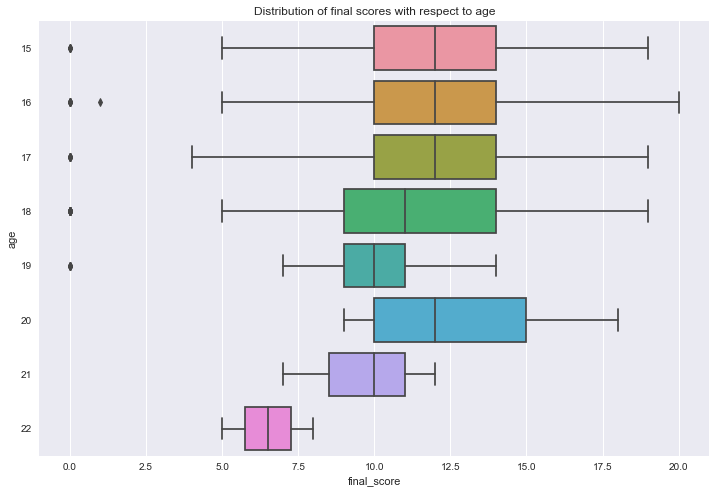

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Distribution of final scores with respect to age")
sns.boxplot(y="age", x="final_score", orient='h',data = student_df);

The boxplots seem to indicate that higher ages (20-22) result in poor grades. But we saw in value counts, that these 3 ages had only few datapoints. Let's look at the swarmplot here:

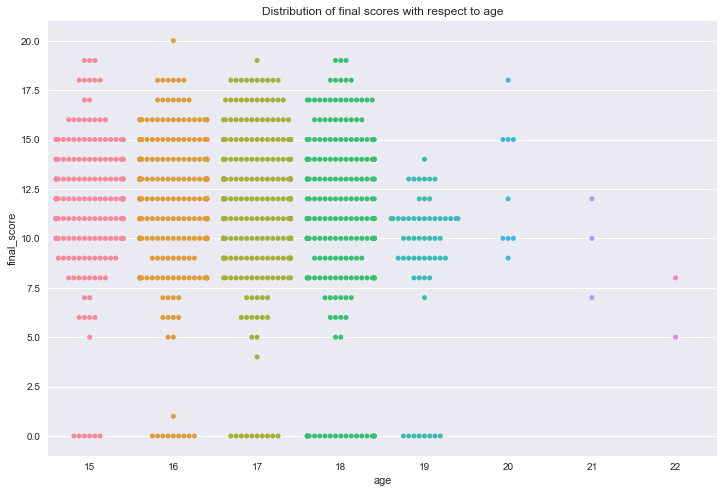

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Distribution of final scores with respect to age")
sns.swarmplot(y="final_score", x="age", data = student_df);

Now it is clear that it's only lack of data in the last three ages (20,21 and 22). Otherwise, age does not seem to affect final score. We can look at age and sex together.

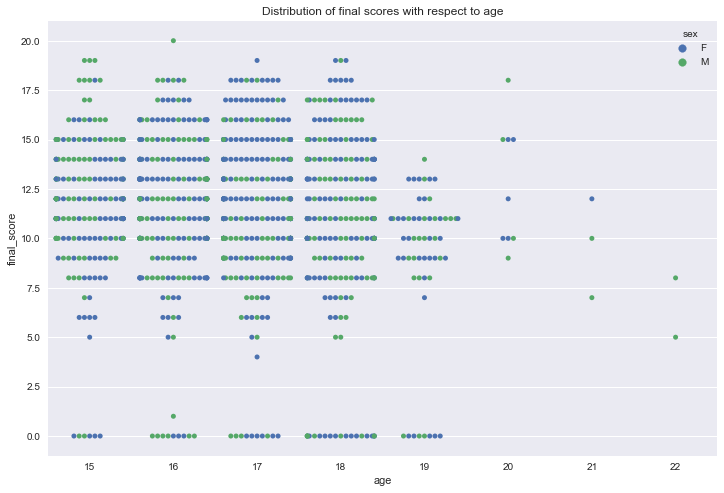

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Distribution of final scores with respect to age")
sns.swarmplot(y="final_score", x="age", hue="sex", data = student_df);

The above graph indicates that there is no clear relation of age or gender with final score.

This is good news. While using machine learning for business applications, we must carefully not to propogate any bias towards any demographic. Now, that these features are not directly related to the model, we can choose to remove them in our final model.

## Study Time

According to [data documentation](https://archive.ics.uci.edu/ml/datasets/student+performance), `studytime` column encodes weekly study time of a student where:
* 1 - <2 hours
* 2 - 2 to 5 hours
* 3 - 5 to 10 hours
* 4 - >10 hours

In [ ]:
# function to convert study time encoding to actual meaning
def convertor_function(study_time):
    if study_time == 1:
        return '<2 hours'
    elif study_time == 2:
        return '2 to 5 hours'
    elif study_time == 3:
        return '5 to 10 hours'
    elif study_time == 4:
        return '>10 hours'

student_df['new_study_time'] = student_df['study_time'].apply(convertor_function)

student_df[['study_time','new_study_time']].sample(10)

,study_time,new_study_time
519,2,2 to 5 hours
532,1,<2 hours
376,3,5 to 10 hours
950,3,5 to 10 hours
501,4,>10 hours
895,1,<2 hours
517,2,2 to 5 hours
789,2,2 to 5 hours
385,3,5 to 10 hours
813,1,<2 hours


Let's look at the distribution of study time

In [ ]:
# Pie chart for study frequency distribution
study_times = student_df["new_study_time"].value_counts().sort_index()

# all study times
labels = (np.array(study_times.index))

# corresponding percentages of each age
sizes = (np.array((study_times / study_times.sum())*100))

# plotting pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes)], layout=go.Layout(title="Student Study Time"))
py.iplot(fig, filename="study_time")

Almost 50% of the students in our dataset study 2-5 hours. Let's see if there is a relationship between study time and final score using boxplots:

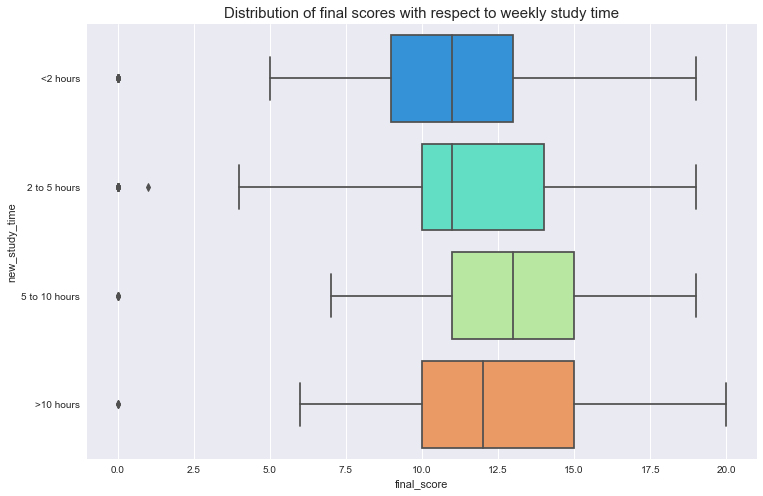

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
o = ['<2 hours','2 to 5 hours','5 to 10 hours','>10 hours']
plt.title("Distribution of final scores with respect to weekly study time",fontsize=15)
sns.boxplot(y="new_study_time", x="final_score", orient='h',order=o, data = student_df,palette='rainbow')
#plt.savefig('studytime_vs_score.jpg')
plt.show()

In [ ]:
print('Average score of students studying <2 hours weekly', student_df[student_df['new_study_time']=='<2 hours'].final_score.mean())
print('Average score of students studying 2 to 5 hours weekly', student_df[student_df['new_study_time']=='2 to 5 hours'].final_score.mean())
print('Average score of students studying 5 to 10 hours weekly', student_df[student_df['new_study_time']=='5 to 10 hours'].final_score.mean())
print('Average score of students studying >10 hours weekly', student_df[student_df['new_study_time']=='>10 hours'].final_score.mean())

Average score of students studying <2 hours weekly 10.580441640378549
Average score of students studying 2 to 5 hours weekly 11.335984095427435
Average score of students studying 5 to 10 hours weekly 12.493827160493828
Average score of students studying >10 hours weekly 12.274193548387096


We see that as study time increases, the average score of the student increases. We can run a hypothesis test to check for significance of this result.

In [ ]:
study_less_than_2_scores = student_df[student_df['new_study_time']=='<2 hours'].final_score
study_2_to_5_scores = student_df[student_df['new_study_time']=='2 to 5 hours'].final_score
study_5_to_10_scores = student_df[student_df['new_study_time']=='5 to 10 hours'].final_score
study_greater_than_10_scores = student_df[student_df['new_study_time']=='>10 hours'].final_score

We will run a [One-Way ANOVA test](https://www.simplypsychology.org/anova.html) to check if there exists a statistically significant difference between the mean score of different study time.

In [ ]:
# Running a one-way ANOVA test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
t_value,p_value=scipy.stats.f_oneway(study_less_than_2_scores, study_2_to_5_scores, study_5_to_10_scores, study_greater_than_10_scores)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for ANOVA test is %f'%p_value)

Test statistic is 10.374445
p-value for ANOVA test is 0.000001


In [ ]:
alpha = 0.05
# testing for significance
if p_value<=alpha:
    print('Difference between final scores for different study times is statistically significant')
else:
    print('Difference between final scores for different study times is not statistically significant')

Difference between final scores for different study times is statistically significant


Thus, we see that in our data, study time is a significant component for academic success and studying more will lead to better results.

# Address (U - Urban, R- Rural)

`address` column contains information about student's home address type.
* "U" - urban
* "R" - rural

This might be an important feature predicting academic success. Urban students might have easier access to alcohol and other fun activities which can result in distraction. Rural students might have less incentive to go to school. Let's look at their frequency distribution first.

In [ ]:
student_df['address'].value_counts()

U    759
R    285
Name: address, dtype: int64

So, vast majority are urban students. Let's see if a direct relationship exists between address and final_grade.

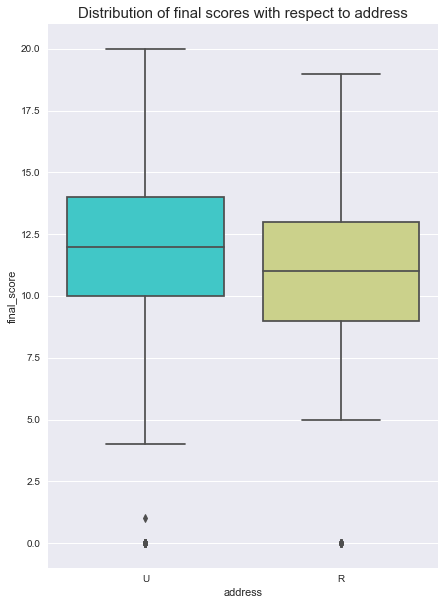

In [ ]:
plt.figure(figsize=(7,10))
plt.title("Distribution of final scores with respect to address",fontsize=15)
sns.boxplot(y="final_score", x="address", data = student_df, palette = 'rainbow');
plt.savefig('Urban vs Rural.jpg')
plt.show()

Boxplots indicate that students residing in urban areas tend to perform better than students residing in rural areas. Let's look at the distributions further using [KDE plots](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to better understand the differences

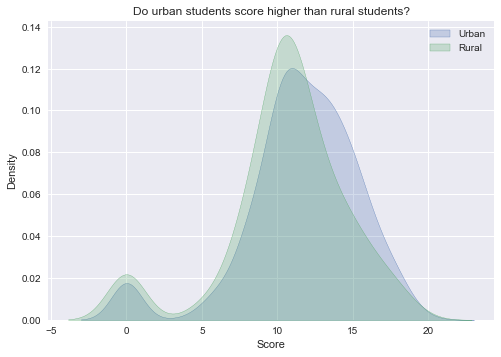

In [ ]:
sns.kdeplot(student_df[student_df['address'] == 'U']['final_score'], label='Urban', shade = True)
sns.kdeplot(student_df[student_df['address'] == 'R']['final_score'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In this plot, both the distributions seem similar. Let's run a two-tailed t-test to check whether the difference in the mean score for urban students and the mean score for rural students is statistically significant.

In [ ]:
urban_student_scores = student_df[student_df['address']=='U']['final_score'].values
rural_student_scores = student_df[student_df['address']=='R']['final_score'].values

In [ ]:
# Running a two-tailed t test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
t_value,p_value=scipy.stats.ttest_ind(urban_student_scores,rural_student_scores)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f'%p_value)

Test statistic is 3.825806
p-value for two tailed test is 0.000138


In [ ]:
alpha = 0.05
# testing for significance
if p_value<=alpha:
    print('Difference between urban and rural final scores is statistically significant')
else:
    print('Difference between urban and rural final scores is not statistically significant')

Difference between urban and rural final scores is statistically significant


Now we know that Rural students tend to score less than Urban ones. Let's try and analyze a variety of factors that might cause this. One of them I believe is `commute_time`.

According to [data documentation](https://archive.ics.uci.edu/ml/datasets/student+performance), `commute_time` column encodes home to school travel time of a student where:
* 1 - <15 mins
* 2 - 15 to 30 mins
* 3 - 30 mins to 1 hour
* 4 - >1 hour

In [ ]:
new = student_df.copy()
# function to convert study time encoding to actual meaning
def convertor_function(study_time):
    if study_time == 1:
        return '<15 mins'
    elif study_time == 2:
        return '15 to 30 mins'
    elif study_time == 3:
        return '30 mins to 1 hour'
    elif study_time == 4:
        return '>1 hour'

new['new_commute_time'] = student_df['commute_time'].apply(convertor_function)



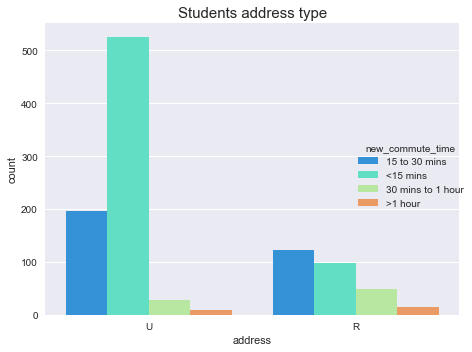

In [ ]:
sns.catplot(x="address", kind="count",hue = "new_commute_time",palette="rainbow", data=new)
plt.title("Students address type",fontsize=15)
plt.tight_layout()
plt.savefig('Commute Time - Urban vs Rural.jpg')
plt.show()

It seems like rural students tend to have higher commute times.

In [ ]:
print('Number of Rural Students with commute time > 1 hour:',len(student_df[(student_df['address']=='R') & (student_df['commute_time']==4)]))
print('Number of Urban Students with commute time > 1 hour:',len(student_df[(student_df['address']=='U') & (student_df['commute_time']==4)]))

Number of Rural Students with commute time > 1 hour: 15
Number of Urban Students with commute time > 1 hour: 9


It is well known that students with higher commute time usually get less time to study and thus there studies suffer. (Source: [Kobus et al., 2018](https://www.sciencedirect.com/science/article/abs/pii/S0166046215000216))

Let's see if that happens in our dataset as well:

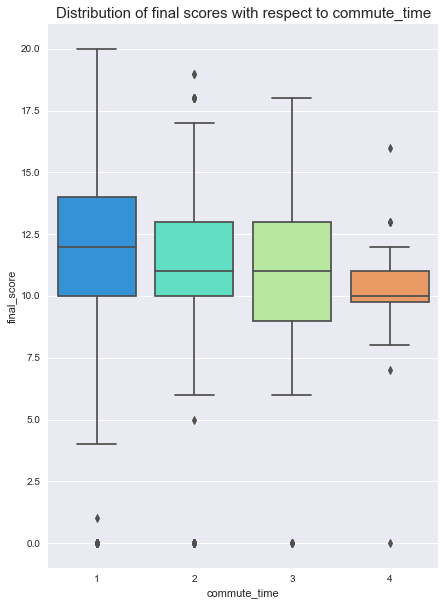

In [ ]:
plt.figure(figsize=(7,10))
plt.title("Distribution of final scores with respect to commute_time",fontsize=15)
sns.boxplot(y="final_score", x="commute_time", data = student_df, palette = 'rainbow');
plt.savefig('Final Score vs Commute Time.jpg')
plt.show()

The graph clearly depicts a downward trend with respect to travel time.

Schools in many countries consider commute time a criteria while admitting students. There are multiple studies that indicate that higher commute times have adverse affect on student health as well (Source: [Pradhan et al., 2017](https://www.researchgate.net/publication/313851579_Impact_of_commuting_distance_and_school_timing_on_sleep_of_school_students)).

So, this graph tends as a proof that parents should prefer schools with lower commute times.

Another factor that might lead to the poor performance of rural students is access to `internet`.

`internet` column encodes whether a student has access to internet or not at home. Let's look at the frequency distribution for internet access

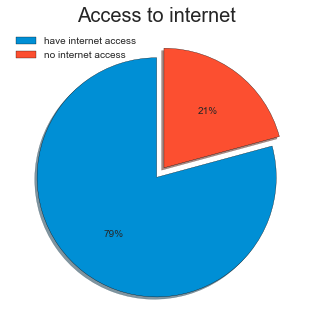

In [ ]:
# Draw Pie-Chart of frequency distribution for internet access
plt.style.use('seaborn')
total_internet = student_df['internet'].value_counts().to_frame().T
labels = 'have internet access', 'no internet access'
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
explode2 = (0.2, 0)
plt.tight_layout()
plt.pie(total_internet.iloc[0], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
plt.legend(loc='best', labels=labels, fontsize='medium')
plt.title('Access to internet',fontsize = 20)
plt.show()

Roughly 80% of all students in our dataset have access to internet. Let's see if this distribution is different for rural and urban areas.

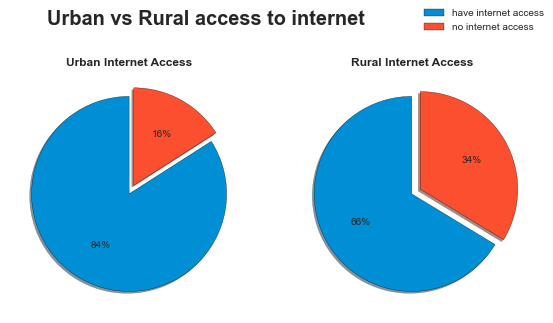

In [ ]:
# Draw pie charts to see frequency distribution of internet access for rural and urban areas

plt.style.use('seaborn')

urban_internet = student_df[student_df['address']=='U']['internet'].value_counts().to_frame().T
rural_internet = student_df[student_df['address']=='R']['internet'].value_counts().to_frame().T

labels = 'have internet access', 'no internet access'
colors = ['#008fd5', '#fc4f30']

fig, ax = plt.subplots(nrows=1, ncols=2)

explode = (0, 0.1)

plt.tight_layout()
ax[0].pie(urban_internet.iloc[0], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[0].set_title('Urban Internet Access', fontweight='bold')

ax[1].pie(rural_internet.iloc[0], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[1].set_title('Rural Internet Access', fontweight='bold')

fig.legend(labels=labels, fontsize='medium')
plt.suptitle('Urban vs Rural access to internet', fontsize=20, fontweight='bold', x = 0.4)
plt.savefig('Internet Access - Urban vs Rural.jpg')
plt.show()

As expected, a higher proportion of urban students have access to internet. 84% of urban students have access to internet vs 66% students with internet access for rural areas.

Studies have shown that having access to internet improves academic performance ([Source](https://nces.ed.gov/pubs2017/2017098/ind_15.asp)). Let's see if that's the case in our dataset as well.

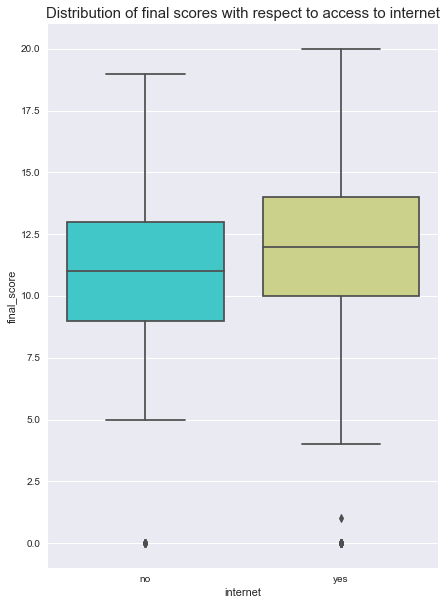

In [ ]:
plt.figure(figsize=(7,10))
plt.title("Distribution of final scores with respect to access to internet",fontsize=15)
sns.boxplot(y="final_score", x="internet", data = student_df, palette = 'rainbow')
plt.savefig('Internet vs Final Score.jpg')
plt.show()

Box plots indicates a higher score for students with internet access.

In [ ]:
print('Mean final score for students with internet access:',student_df[student_df['internet']=='yes']['final_score'].median())
print('Mean final score for students without internet access:',student_df[student_df['internet']=='no']['final_score'].median())

Mean final score for students with internet access: 12.0
Mean final score for students without internet access: 11.0


Thus, if students get internet access at home, they tend to perform better. It is important to monitor student internet usage though, as it might lead to an endless cycle of video games or youtube videos.

School districts should also work with students who don't have access to internet and see if some arrangements can be made to help such students in this day and age of online learning. Some tips include:
1. Encouraging students to use community resources like public libraries.
2. Make remote learning accessible through offline features.
3. Provid mobile hotspots to students from disadvantaged backgrounds.

# Wish to go for Higher Education

`desire_higher_edu` column indicates whether a student wants to take higher education or not. Let's look at its frequency distribution:

In [ ]:
student_df['desire_higher_edu'].value_counts()/len(student_df)

yes    0.914751
no     0.085249
Name: desire_higher_edu, dtype: float64

It's nice to see that majority of the students wish to opt for higher (college) education. This data is slightly old and is for portugese students. There has been a decline in the number of students wanting to opt for university.

In US, about 75% high school students plan on going for higher education ([source](https://eab.com/insights/daily-briefing/enrollment/75-of-teens-plan-to-attend-higher-ed-after-high-school/)).

As a lot of higher education programs consider academic performance in the admission criteria, it is expected that students who desire to go that path will focus more on earning a better grade. Let's see if that's the case in our dataset.

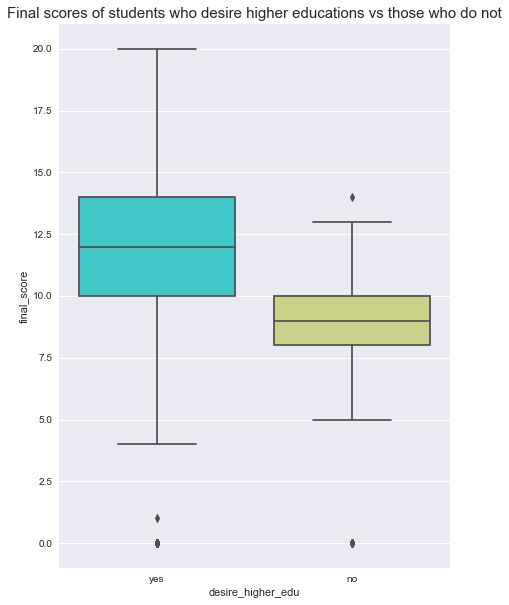

In [ ]:
plt.figure(figsize=(7,10))
plt.title("Final scores of students who desire higher educations vs those who do not",fontsize="15")
sns.boxplot(y="final_score", x="desire_higher_edu", data = student_df, palette = 'rainbow')
plt.savefig('desire to go for higher edu.jpg')
plt.show()

There is a very significant trend here. This seems to be a very important feature in predicting academic success.

Students who desire to go for higher education perform better in high-school finals.

# Going out with Friends

Socialising is a very important part of high school life. There are many benefits of having healthy friendly relationships that go well beyond student life. It helps overcome social anxiety, improve communication skills, and improve mental and social wellbeing.

As our target is academic performance, we will analyse the impact of going out with friends on `final_score`.

`go_out` column in our dataset indicates the frequency of going out with friends. It ranges from 1 - very low to 5 - very high.

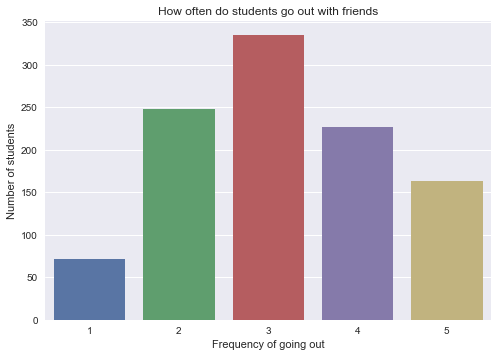

In [ ]:
# frequency distribuiton of going out
tmp_plt = sns.countplot(x = 'go_out', data = student_df)
tmp_plt.axes.set_title('How often do students go out with friends')
tmp_plt.set_xlabel('Frequency of going out')
tmp_plt.set_ylabel('Number of students')
plt.show()

We see that most students lie in the middle of this distribution which means that most students go out in moderation.
Let's see the effect of going out on `final_score`:

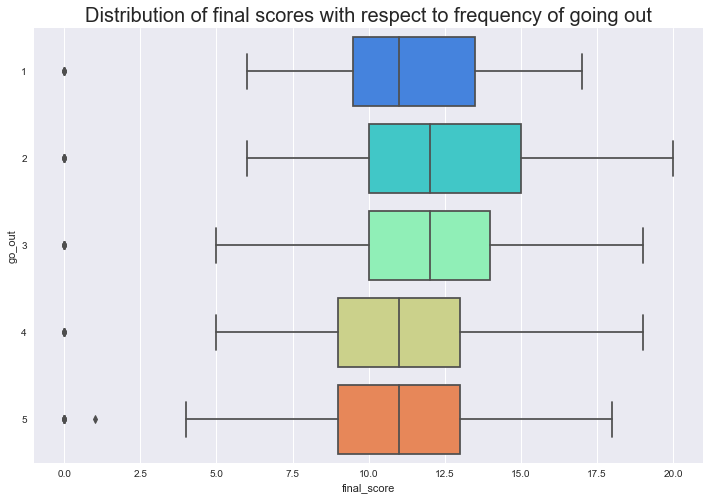

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Distribution of final scores with respect to frequency of going out",fontsize=20)
sns.boxplot(y="go_out", x="final_score", orient='h',data = student_df, palette = 'rainbow');
plt.show()

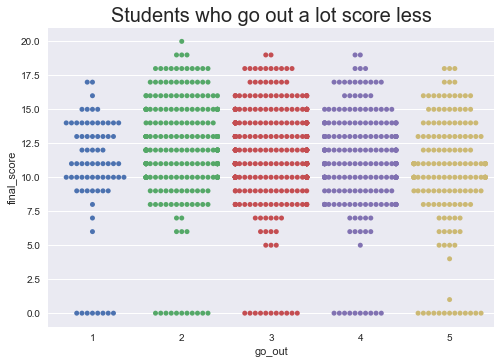

In [ ]:
sns.swarmplot(x='go_out',y='final_score',data=student_df)
plt.title('Students who go out a lot score less',fontsize=20)
plt.show()

There seems to be a slightly downward trend on the graphs especially for students who go out very frequently.

Students who tend to go out moderately seem to perform the best. There are many studies which indicate that prosocial behaviour is a critical component of academic success (Source: [DeVeries et al., 2018](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5994475/))

## Absentism

I think it's fair to expect that students who are more absent in school generally perform poorly in exams. This is why many schools have strict attendance requirements.

Let's study the impact of absentism on `final_score` in our dataset.

`absences` is a numerical column that indicates number of school absences.

In [ ]:
student_df['absences'].describe()

count    1044.000000
mean        4.434866
std         6.210017
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max        75.000000
Name: absences, dtype: float64

We see that absences are between the range of 0 and 75. Let's look at it's distribution.

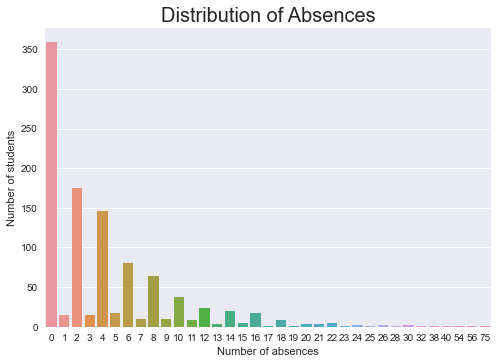

In [ ]:
# absences distribution
tmp_plt = sns.countplot(x = 'absences', data = student_df)
tmp_plt.axes.set_title('Distribution of Absences', fontsize=20)
tmp_plt.set_xlabel('Number of absences')
tmp_plt.set_ylabel('Number of students')
plt.show()

The graph shows that most of the students are very regular to the classes and there are only a few students that are very irregular to school. Let's see the impact of number of absences to final score of the student.

Correlation Coefficient of absences with final_score: -0.045670576988373665


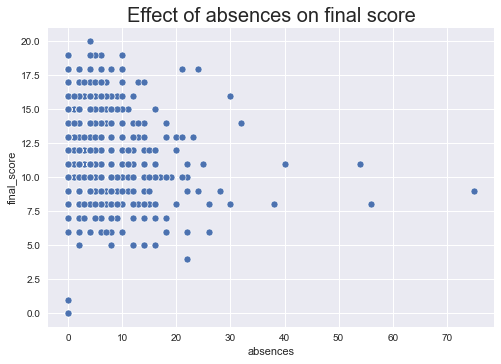

In [ ]:
print('Correlation Coefficient of absences with final_score:',student_df['absences'].corr(student_df['final_score']))
sns.scatterplot(x='absences',y='final_score',data=student_df)
plt.title('Effect of absences on final score',fontsize=20)
plt.show()

There seems to be a negligible negative correlation between the two columns.

The lack of a clear tend may be due to the fact that we don't have a lot of students that are irregular in school. But for now, we don't see a clear relationship between attendance regularity and final grade.

# Romantic Relationship

This is a very interesting subject to study: 'Effect of Romantic relationship on academic success of high-school students'.

High school relationships have a tendency to be volatile and can end up causing a lot of stress for a teenager as they are not fully mature to deal with emotional aspects of a relationship.

At the same time, it is seen that being in healthy relationships helps with mood regulation and overall mental illness.

`romantic` column in our dataset indicates whether a student is in a relationship(`yes`) or not(`no`).

Let's start by looking at the frequency distribution:

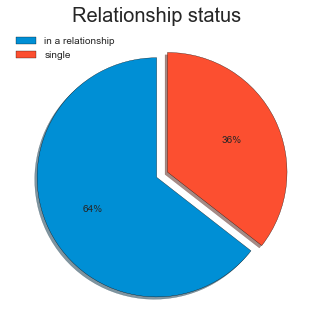

In [ ]:
# Draw Pie-Chart of frequency distribution for relationship status
plt.style.use('seaborn')
total_relationship = student_df['romantic'].value_counts().to_frame().T
labels = 'in a relationship', 'single'
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
explode2 = (0.2, 0)
plt.tight_layout()
plt.pie(total_relationship.iloc[0], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
plt.legend(loc='best', labels=labels, fontsize='medium')
plt.title('Relationship status',fontsize = 20)
plt.savefig('Romantic status.jpg')
plt.show()

Approximately 64% of the students in our dataset are in a relationship. Let's now look at it's impact on their final score:

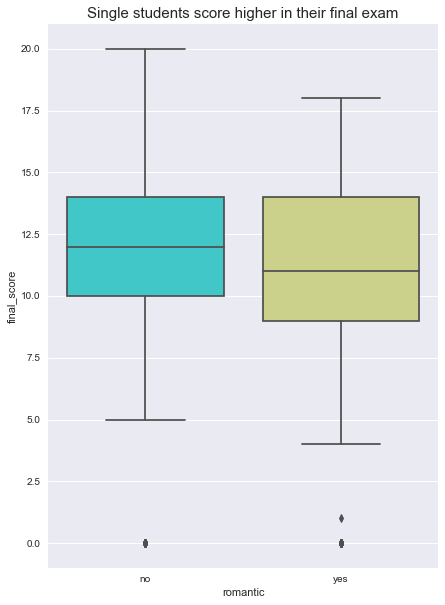

In [ ]:
plt.figure(figsize=(7,10))
plt.title("Single students score higher in their final exam",fontsize="15")
sns.boxplot(y="final_score", x='romantic', data = student_df, palette = 'rainbow');
plt.savefig('Romance vs final score.jpg')
plt.show()

The boxplot indicates that single students perform better in their exams. Let's check this hypothesis using a two-tailed t-test.

In [ ]:
single_student_scores = student_df[student_df['romantic']=='no']['final_score'].values
in_rel_student_scores = student_df[student_df['romantic']=='yes']['final_score'].values

In [ ]:
# Running a two-tailed t test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
t_value,p_value=scipy.stats.ttest_ind(single_student_scores,in_rel_student_scores)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f'%p_value)

Test statistic is 3.190633
p-value for two tailed test is 0.001462


In [ ]:
alpha = 0.05
# testing for significance
if p_value<=alpha:
    print('Difference between single and in-relationship final scores is statistically significant')
else:
    print('Difference between single and in-relationship final scores is not statistically significant')

Difference between single and in-relationship final scores is statistically significant


We have established that romantic relationships tend to negatively affect student performance. This could be due to the fct that teenagers in love would prefer to spend time with each other over studying.

Now, let's try to analyze this trend further. Let's see if this effect is more profound for one gender over other:

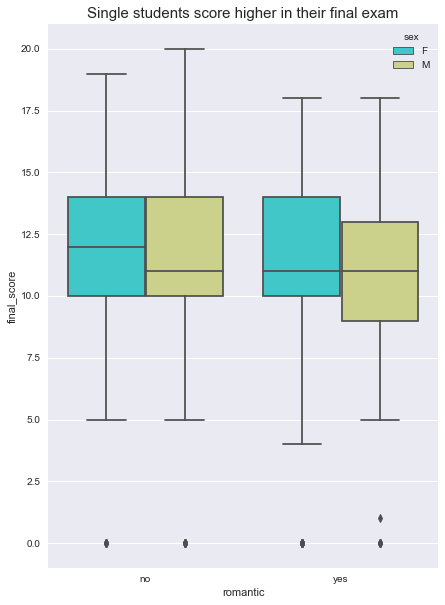

In [ ]:
plt.figure(figsize=(7,10))
plt.title("Single students score higher in their final exam",fontsize="15")
sns.boxplot(y="final_score", x='romantic', hue="sex", data = student_df, palette = 'rainbow');
plt.show()

In [ ]:
student_df.groupby(["sex","romantic"])['final_score'].mean()

sex  romantic
F    no          11.836158
     yes         10.869198
M    no          11.388715
     yes         10.761194
Name: final_score, dtype: float64

Both the genders seem to be affected by relationships. The effect seems to be higher on females. This is also found in literature as well ([Zayed, 2016](https://www.researchgate.net/publication/353193236_Romantic_relationships_effects_academically_and_psychologically)).

Let's see if relationship status impacts studying time:

In [ ]:
student_df[student_df['romantic']=='no']['new_study_time'].value_counts()

2 to 5 hours     314
<2 hours         222
5 to 10 hours     88
>10 hours         49
Name: new_study_time, dtype: int64

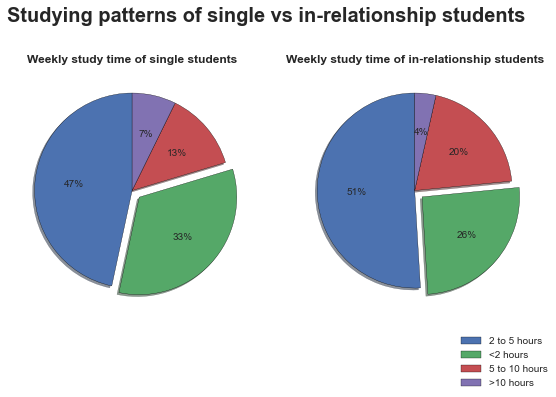

In [ ]:
# Draw pie charts to see frequency distribution of internet access for rural and urban areas

plt.style.use('seaborn')

single_study_time = student_df[student_df['romantic']=='no']['new_study_time'].value_counts().to_frame().T
in_relationship_study_time = student_df[student_df['romantic']=='yes']['new_study_time'].value_counts().to_frame().T

labels = ['2 to 5 hours', '<2 hours','5 to 10 hours','>10 hours']
#colors = ['#008fd5', '#fc4f30']

fig, ax = plt.subplots(nrows=1, ncols=2)

explode = (0, 0.1,0,0)

plt.tight_layout()
ax[0].pie(single_study_time.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[0].set_title('Weekly study time of single students', fontweight='bold')

ax[1].pie(in_relationship_study_time.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[1].set_title('Weekly study time of in-relationship students', fontweight='bold')

fig.legend(labels=labels, loc='lower right',fontsize='medium')
plt.suptitle('Studying patterns of single vs in-relationship students', fontsize=20, fontweight='bold')
plt.show()

This seems to be quite mixed. While the students who study the most are single, the students who seem to study the least are also single.

## Alcohol Consumption

Now let's look at teen alcohol consumption.

Considering that it is illegal in US to drink below 21 years of age, it is surprising to know that nearly 50% of all high school students drink alcohol. Excesive consumption of alcohol in people below 21 years of age is considered to be responsible for approximately 4,300 deaths every year from 2006 -2010 ([Esser et al., 2016](https://www.cdc.gov/mmwr/volumes/66/wr/mm6618a4.htm)).

Studies also indicate there has been a rise in [binge drinking](https://www.cdc.gov/alcohol/fact-sheets/binge-drinking.htm) among high-schoolers, which means that when students drink they end up drinking a lot of alcohol. This is even more dangerous than regular alcohol usage.

It is clear that teenage drinking is a major health concern in US and while we have seen some improvements over the years([Esser et al., 2016](https://www.cdc.gov/mmwr/volumes/66/wr/mm6618a4.htm)), more needs to be done to mitigate this situation.

In our analysis, we will focus on the impact of alcohol consumption on academic performance.

Studies indicate that increase in alcohol consumption leads to poorer academic performance([Balsa et al., 2012](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3026599/), [Ansari et al., 2013](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3843305/)).

Let's see if our dataset shows similar trend. Two columns in our dataset will be our prime focus:

* `weekday_alcohol_usage`: workday alcohol consumption (from 1 - very low to 5 - very high)
* `weekend_alcohol_usage`: weekend alcohol consumption (from 1 - very low to 5 - very high)

Let's look at the frequency distributions of alcohol consumption between weekdays and weekends.

In [ ]:
student_df['weekend_alcohol_usage'].value_counts()

1    398
2    235
3    200
4    138
5     73
Name: weekend_alcohol_usage, dtype: int64

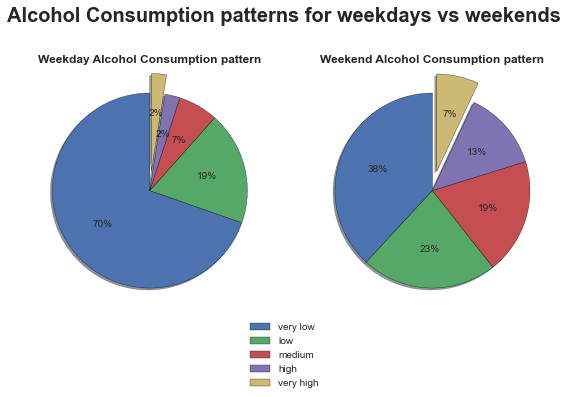

In [ ]:
# Draw pie charts to see frequency distribution of alcohol consumption for weekdays and weekends
plt.style.use('seaborn')

weekday_alcohol_consumption = student_df['weekday_alcohol_usage'].value_counts().to_frame().T
weekend_alcohol_consumption = student_df['weekend_alcohol_usage'].value_counts().to_frame().T

labels = ['very low', 'low','medium','high','very high']

fig, ax = plt.subplots(nrows=1, ncols=2)

explode = (0, 0,0,0,0.2)

plt.tight_layout()
ax[0].pie(weekday_alcohol_consumption.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[0].set_title('Weekday Alcohol Consumption pattern', fontweight='bold')

ax[1].pie(weekend_alcohol_consumption.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[1].set_title('Weekend Alcohol Consumption pattern', fontweight='bold')

fig.legend(labels=labels, loc='lower center',fontsize='medium')
plt.suptitle('Alcohol Consumption patterns for weekdays vs weekends', fontsize=20, fontweight='bold')
plt.savefig('Alcohol consumption stats.jpg')
plt.show()

It's good to see that 70% of the students drink very low alcohol on weekdays. As expected alcohol usage increases over the weekend. Let's now look at the impact of alcohol consumption on academic performance.

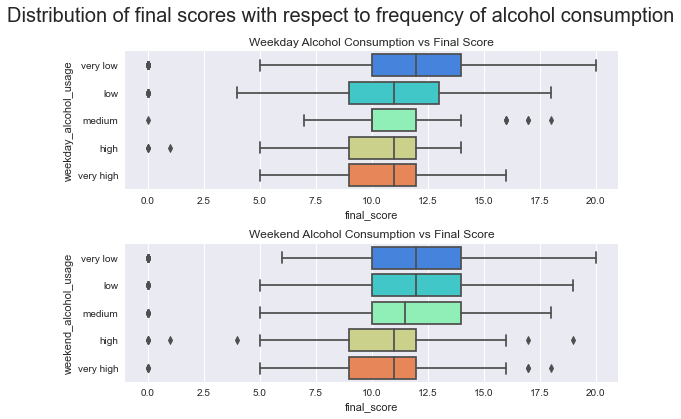

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1)
b1 = sns.boxplot(y="weekday_alcohol_usage", x="final_score", orient='h',data = student_df, palette = 'rainbow',ax=ax[0])
b1.set_title("Weekday Alcohol Consumption vs Final Score")
b1.set_yticklabels(['very low', 'low','medium','high','very high'])

b2 = sns.boxplot(y="weekend_alcohol_usage", x="final_score", orient='h',data = student_df, palette = 'rainbow',ax=ax[1])
b2.set_title("Weekend Alcohol Consumption vs Final Score")
b2.set_yticklabels(['very low', 'low','medium','high','very high'])

plt.tight_layout()


plt.suptitle("Distribution of final scores with respect to frequency of alcohol consumption",fontsize=20,y=1.05)
plt.savefig('Alcohol vs grades.jpg')
plt.show()

In both the cases, we see that alcohol consumption leads to decline in `final_score`. Let's run a hypothesis test using ANOVA to check for significance of this effect. We will first look at weekend drinking.

In [ ]:
very_low_weekend_drinking = student_df[student_df['weekend_alcohol_usage']==1].final_score
low_weekend_drinking = student_df[student_df['weekend_alcohol_usage']==2].final_score
medium_weekend_drinking = student_df[student_df['weekend_alcohol_usage']==3].final_score
high_weekend_drinking = student_df[student_df['weekend_alcohol_usage']==4].final_score
very_high_weekend_drinking = student_df[student_df['weekend_alcohol_usage']==5].final_score

We will run a [One-Way ANOVA test](https://www.simplypsychology.org/anova.html) to check if there exists a statistically significant difference between the mean score of different alcohol consumption pattern.

In [ ]:
# Running a one-way ANOVA test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
t_value,p_value=scipy.stats.f_oneway(very_low_weekend_drinking,low_weekend_drinking,medium_weekend_drinking,high_weekend_drinking,very_high_weekend_drinking)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for ANOVA test is %f'%p_value)

Test statistic is 3.780943
p-value for ANOVA test is 0.004641


In [ ]:
alpha = 0.05
# testing for significance
if p_value<=alpha:
    print('Difference between final scores for different alcohol consumption patterns over the weekend is statistically significant')
else:
    print('Difference between final scores for different alcohol consumption patterns over the weekend is not statistically significant')

Difference between final scores for different alcohol consumption patterns over the weekend is statistically significant


In [ ]:
pd.DataFrame({'Weekend Alcohol Usage':['very low', 'low','medium','high','very high'],
    'Average Final Score':student_df.groupby('weekend_alcohol_usage').mean()['final_score'].values
             })

,Weekend Alcohol Usage,Average Final Score
0,very low,11.743719
1,low,11.472340
2,medium,11.290000
3,high,10.536232
4,very high,10.397260


So, increase in weekend alcohol consumption has a significant negative impact on final score. Let's test the same for weekday alcohol consumption as well.

In [ ]:
very_low_weekday_drinking = student_df[student_df['weekday_alcohol_usage']==1].final_score
low_weekday_drinking = student_df[student_df['weekday_alcohol_usage']==2].final_score
medium_weekday_drinking = student_df[student_df['weekday_alcohol_usage']==3].final_score
high_weekday_drinking = student_df[student_df['weekday_alcohol_usage']==4].final_score
very_high_weekday_drinking = student_df[student_df['weekday_alcohol_usage']==5].final_score

In [ ]:
# Running a one-way ANOVA test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
t_value,p_value=scipy.stats.f_oneway(very_low_weekday_drinking,low_weekday_drinking,medium_weekday_drinking,high_weekday_drinking,very_high_weekday_drinking)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for ANOVA test is %f'%p_value)

Test statistic is 6.241569
p-value for ANOVA test is 0.000058


In [ ]:
alpha = 0.05
# testing for significance
if p_value<=alpha:
    print('Difference between final scores for different alcohol consumption patterns during work days is statistically significant')
else:
    print('Difference between final scores for different alcohol consumption patterns during work days is not statistically significant')

Difference between final scores for different alcohol consumption patterns during work days is statistically significant


In [ ]:
pd.DataFrame({'Weekday Alcohol Usage':['very low', 'low','medium','high','very high'],
    'Average Final Score':student_df.groupby('weekday_alcohol_usage').mean()['final_score'].values
             })

,Weekday Alcohol Usage,Average Final Score
0,very low,11.704264
1,low,10.556122
2,medium,10.898551
3,high,9.269231
4,very high,10.384615


We see an even more significant negative impact of increase in alcohol consumption on final score when done during workdays.

There is also an inconsistancy here that the mean final score is higher for `very high` alcohol consumption compared to `high consumption` on weekdays. This could be due to the very low number of students who consume `very high` alcohol during weekdays.

Neverthless, the trend is very clear. Increasing alcohol consumption among high school students will lead to decrease in academic performance.

## Parent's education

Many studies indicate that parent's education levels have a critical impact on a child's academic and long-term career success. ([Dubow et al., 2009](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2853053/))

Educated parents can often help students with their studies and also help instill studying discipline in their children. They are also better equipped to deal with school curricullum and help guide their children to their chosen careers ([source](https://degree.lamar.edu/articles/undergraduate/parents-education-level-and-childrens-success/)).

Many schools worldwide consider parent's education as an important criteria while admitting a student into their programs. We will now run an analysis on our dataset to see if this criteria holds any merit or is based on archaic ideas of student success.

There are two columns related to parent's education in our dataset:
* `mother_education`: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education
* `father_education`: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education

Let's first look at the distribution of education for both mothers and fathers.

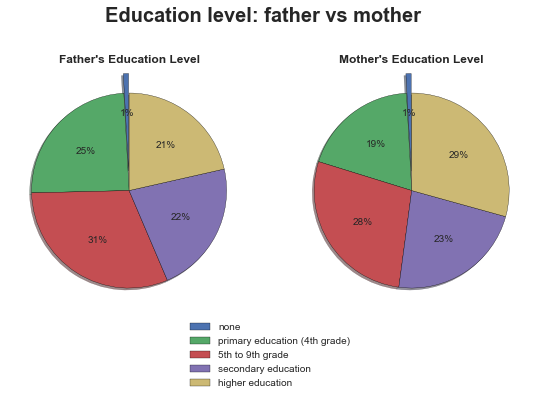

In [ ]:
# Draw pie charts to see frequency distribution of education of fathers and mothers
plt.style.use('seaborn')

father_edu = student_df['father_education'].value_counts().sort_index().to_frame().T
mother_edu = student_df['mother_education'].value_counts().sort_index().to_frame().T

labels = ['none', 'primary education (4th grade)','5th to 9th grade','secondary education','higher education']

fig, ax = plt.subplots(nrows=1, ncols=2)

explode = (0.2, 0,0,0,0)

plt.tight_layout()
ax[0].pie(father_edu.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[0].set_title("Father's Education Level", fontweight='bold')

ax[1].pie(mother_edu.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[1].set_title("Mother's Education Level", fontweight='bold')

fig.legend(labels=labels, loc='lower center',fontsize='medium')
plt.suptitle('Education level: father vs mother', fontsize=20, fontweight='bold')
plt.savefig('Parents education.jpg')
plt.show()

The none values indicate no education seem to be very low in number. These could be rows for which we have no info about parent's education or the students are orphans. We will ignore these values for our further analysis.

We see that overall mothers seem to have better education than fathers. Let's look at the impact of parent's education on final score:

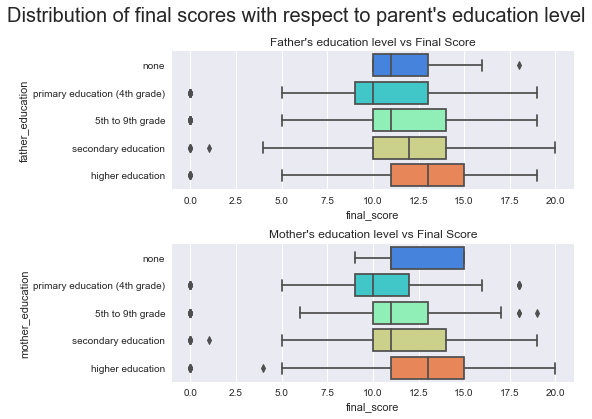

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1)
b1 = sns.boxplot(y="father_education", x="final_score", orient='h',data = student_df, palette = 'rainbow',ax=ax[0])
b1.set_title("Father's education level vs Final Score")
b1.set_yticklabels(labels = ['none', 'primary education (4th grade)','5th to 9th grade','secondary education','higher education'])

b2 = sns.boxplot(y="mother_education", x="final_score", orient='h',data = student_df, palette = 'rainbow',ax=ax[1])
b2.set_title("Mother's education level vs Final Score")
b2.set_yticklabels(labels = ['none', 'primary education (4th grade)','5th to 9th grade','secondary education','higher education'])

plt.tight_layout()
plt.suptitle("Distribution of final scores with respect to parent's education level",fontsize=20,y=1.05)
plt.savefig('Parent education vs final score.jpg')
plt.show()

It can be seen that for both the parents, having better education will lead to better academic success for the student.

Interestingly, this effect seems to be more profound for fathers. This is consistent with literature that suggests that father's education level is a very strong factor for child's success at school ([source](https://www.theguardian.com/society/2014/sep/23/fathers-education-child-success-school))

## Family Quality

[Anna J Egalite](https://www.educationnext.org/how-family-background-influences-student-achievement/) covered the impact family background can have on a student's academic success. While other factors are equally important, the family that you are born into, the socio-economic factors, the home environment and your parents support does impact your life very significantly.

In our dataset, we have column called `family_quality` which we will use to analyze impact of family quality on a student's grade. It captures the quality of family relationships, going from 1 (very bad) to 5 (excellent).

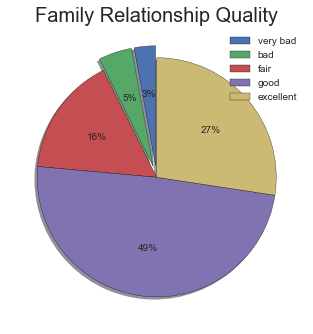

In [ ]:
# Draw Pie-Chart of frequency distribution for family relationship quality

plt.style.use('seaborn')

family_relationship = student_df['family_quality'].value_counts().sort_index().to_frame().T
labels = 'very bad', 'bad', 'fair', 'good', 'excellent'
#colors = ['#008fd5', '#fc4f30']
explode = (0.1, 0.1, 0, 0, 0)
plt.tight_layout()
plt.pie(family_relationship.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
plt.legend(loc='best', labels=labels, fontsize='medium')
plt.title('Family Relationship Quality',fontsize = 20)
plt.show()

This variable was recorded through surveys filled by students themselves. It is refreshing to see that only 8% students feel that they have a bad/very bad family situation. More than 75% of the students rated their family relationship quality as good or excellent.

Let's now see the impact of family quality on final score:

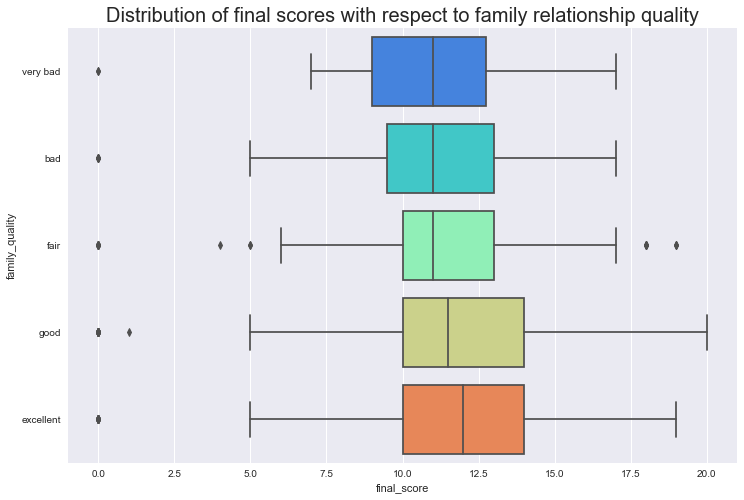

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Distribution of final scores with respect to family relationship quality",fontsize=20)
plot = sns.boxplot(y="family_quality", x="final_score", orient='h',data = student_df, palette = 'rainbow')
plot.set_yticklabels(labels)
plt.show()

We see a consistent linear trend here. As quality of family relationships increase, a student's final score increases as well.

Let's look at a factor that might impact the quality of family relationships - `parents_status`. This column contains information on parent's cohabitation status ("T" - living together or "A" - apart). Let's look at the distribution of family relationship quality with respect to `parents_status`.

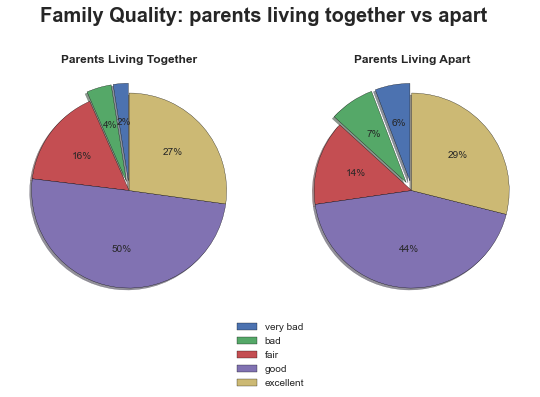

In [ ]:
# Draw pie charts to see frequency distribution of education of fathers and mothers
plt.style.use('seaborn')

parents_living_together = student_df[student_df['parents_status']=='T']['family_quality'].value_counts().sort_index().to_frame().T
parents_living_apart = student_df[student_df['parents_status']=='A']['family_quality'].value_counts().sort_index().to_frame().T

labels = 'very bad', 'bad', 'fair', 'good', 'excellent'

explode = (0.1, 0.1, 0, 0, 0)

fig, ax = plt.subplots(nrows=1, ncols=2)

plt.tight_layout()
ax[0].pie(parents_living_together.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[0].set_title("Parents Living Together", fontweight='bold')

ax[1].pie(parents_living_apart.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[1].set_title("Parents Living Apart", fontweight='bold')

fig.legend(labels=labels, loc='lower center',fontsize='medium')
plt.suptitle('Family Quality: parents living together vs apart', fontsize=20, fontweight='bold')
plt.show()

We see that in our dataset, the quality of family relationships is reduced when parents live apart.

### Important Insights from EDA
1. Student age or gender do not affect academic grade.
2. Increasing study time improves final results.
3. Increased alcohol consumption decreases final results.
4. Relationships do impact your academic score.
5. Family plays a major role in a child's academic success whether it is parent's education or their relationship status.
6. Parents should look for a school closer to their home as increased commute time affects academic performance negatively.

## NOTE: IF YOU ARE NEW TO DATA ANALYTICS, THEN SKIP THE SECTION BELOW THIS

# Modeling

## Preparing data for Machine Learning

Now, we will prepare our dataset for machine learning. We have already cleaned our dataset and removed filler values.

We now need to handle all the categorical columns and do some feature engineering.

As our target variable is continuous, this will be a regression task. We will evaluate our models using commonly used accuracy metrics like [R-squared or coefficient of determination](https://www.investopedia.com/terms/r/r-squared.asp), [RMSE](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/) and [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error).

While discussing the target variable `final_score` during EDA, we discussed the case of many zero values. We showed that there could be multiple reasons for it and there is no clarification from the authors of this dataset on what exactly does the zero final score represent for each row.

This is why we chose to consider them as outliers and remove them from the dataset.

In [ ]:
# removing all rows where final score is 0
student_df = student_df[student_df['final_score']!=0]
print(len(student_df))

991


So, the new dataset now has 991 rows and no students with a zero score.  

In [ ]:
# splitting the data into features(X) and target variable(y)
X = student_df.copy()

# dropping the irrelvant columns and the target variable from X
X = X.drop(['new_study_time','final_score'],axis=1)
y = student_df['final_score']

All ordinal variables in our dataset are already encoded. All nominal categorical variables in our data are of object type. We can directly call `pandas.get_dummies` to convert them into one-hot encoded columns suitable for machine learning.

In [ ]:
# setting drop_first = True to decrease dimensionality and remove one filler column
X = pd.get_dummies(X,drop_first=True)
X

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,...,guardian_mother,guardian_other,school_support_yes,family_support_yes,paid_classes_yes,activities_yes,nursery_yes,desire_higher_edu_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,19,2,3,1,3,1,5,4,2,1,...,1,0,0,0,0,1,0,1,1,0
1040,18,3,1,1,2,0,4,3,4,1,...,1,0,0,1,0,0,1,1,1,0
1041,18,1,1,2,2,0,1,1,1,1,...,1,0,0,0,0,1,1,1,0,0
1042,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0


We have a total of 41 columns and 991 data points in our X.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

Now we will split our dataset into two parts: a training dataset and a testing dataset.

We chose a 80-20 split and we will use sklearn's `train_test_split` function to do so.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [ ]:
X_train.head()

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,...,guardian_mother,guardian_other,school_support_yes,family_support_yes,paid_classes_yes,activities_yes,nursery_yes,desire_higher_edu_yes,internet_yes,romantic_yes
910,0.142857,0.25,0.50,0.000000,0.000000,0.0,0.75,0.75,0.75,0.25,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
47,0.142857,1.00,0.75,0.000000,1.000000,0.0,0.75,0.25,0.25,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
517,0.000000,0.25,0.50,0.000000,0.333333,0.0,0.25,0.50,0.75,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
631,0.428571,0.50,0.25,0.333333,0.666667,0.0,0.75,0.75,0.75,0.00,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
19,0.142857,1.00,0.75,0.000000,0.000000,0.0,0.50,0.00,0.50,0.00,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


In [ ]:
y_train.head()

951    11
47     20
555    11
670    11
19     10
Name: final_score, dtype: int64

In [ ]:
print('Size of training data:',len(y_train))
print('Size of testing data:',len(y_test))

Size of training data: 792
Size of testing data: 199


## Baseline Model

The first step would be to build a naive model to get a baseline level of performance. Our target then would be to build a model that does better than atleast this model.

We will use Sklearn's `DummyRegressor` here with the `mean` strategy. This would only output the mean of the training data as it's prediction. Let's evaluate this model.

In [ ]:
# create a dummy regressor
dummy_reg = DummyRegressor(strategy='mean')

# fit it on the training set
dummy_reg.fit(X_train, y_train)

# make predictions on the test set
y_pred = dummy_reg.predict(X_test)

# calculate root mean squared error on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("RMSE for Dummy Regressor:", rmse)
print("MAE for Dummy Regressor:", mae)
print("R-Squared for Dummy Regressor:", r2)

RMSE for Dummy Regressor: 2.859872873921179
MAE for Dummy Regressor: 2.365324095223593
R-Squared for Dummy Regressor: -0.032955765537687975


As expected, this is a very bad model. A negative R-Squared means that this model is predicting worse than the mean of the test data. This will serve as our naive baseline.

Let's now jump to our first model. We will start things with a simple linear regression.

# Linear Regression

I will start with a [linear regression model](https://www.ibm.com/in-en/topics/linear-regression). There are a lot of variables that have clear statistical relationship with the target variable so I am expecting a good performance from this model.

In [ ]:
# create a linear regression model
lin_reg = LinearRegression()
# fit on the training data
lin_reg.fit(X_train, y_train)
# make predictions on the test set
y_pred = lin_reg.predict(X_test)

# calculate root mean squared error on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE for Linear Regressor:", rmse)
print("MAE for Linear Regressor:", mae)
print("R-Squared for Linear Regressor:", r2)


RMSE for Linear Regressor: 0.8598858292632802
MAE for Linear Regressor: 0.673339985436196
R-Squared for Linear Regressor: 0.9066165636896389


We see a fairly good performance even without any optimization on the linear regression model. This tells me that we have some really good features.

Now we will do some [feature selection](https://en.wikipedia.org/wiki/Feature_selection). We will be using the [chi-square test](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/8-chi-squared-tests) to measure the dependence of the target variable on all the features.

Then we will pick the k-best features from the lot. We will tune the value of k by runninng a grid search on all plausible values for k to find the optimal k.

In [ ]:
# to find optimal number of features to use in the model
# we are using chi-square test from sklearn https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
from sklearn.feature_selection import SelectKBest, chi2

test_mses=[]

for i in range(1,len(X_train.columns)):
    # select k best features
    sk = SelectKBest(chi2, k=i)

    # filter only the k best features
    X_new = sk.fit_transform(X_train,y_train)
    X_new_test=sk.fit_transform(X_test,y_test)

    # fit linear regression on the k best features
    temp_lr = lin_reg.fit(X_new, y_train)

    # find mse on the test set
    temp_y_pred = temp_lr.predict(X_new_test)
    test_mse = mean_squared_error(y_test, temp_y_pred)

    # append mse to list
    test_mses.append(test_mse)

# value of k for which mse is lowest
optimal_k = np.argmin(test_mses) +1

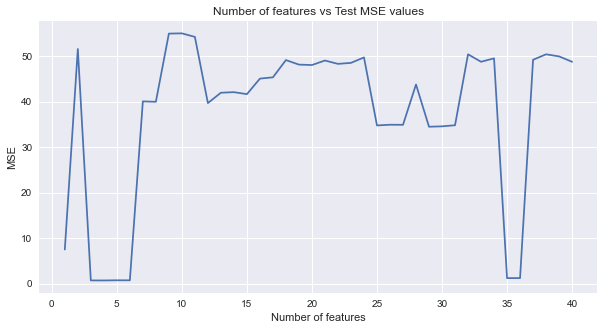

Optimal k: 4


In [ ]:
# k vs mse
plt.figure(figsize=(10,5))
plt.plot(range(1,len(X_train.columns)), test_mses)
plt.xlabel('Number of features')
plt.ylabel('MSE')
plt.title('Number of features vs Test MSE values')
plt.show()
print('Optimal k:',optimal_k)

We will now use the optimal k for our final model.

In [ ]:
# final model
sk = SelectKBest(chi2, k=optimal_k)
X_new = sk.fit_transform(X_train,y_train)
X_new_test=sk.fit_transform(X_test,y_test)

In [ ]:
# create a linear regression model
lin_reg = LinearRegression()
# fit on the training data
lin_reg.fit(X_new, y_train)
# make predictions on the test set
y_pred = lin_reg.predict(X_new_test)

# calculate root mean squared error on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE for Linear Regressor:", rmse)
print("MAE for Linear Regressor:", mae)
print("R-Squared for Linear Regressor:", r2)

RMSE for Linear Regressor: 0.8525840803275168
MAE for Linear Regressor: 0.681837184150793
R-Squared for Linear Regressor: 0.9081957672420428


We receive a strong R-Squared of 0.908. Let's look at the residual plots to evaluate model even further.

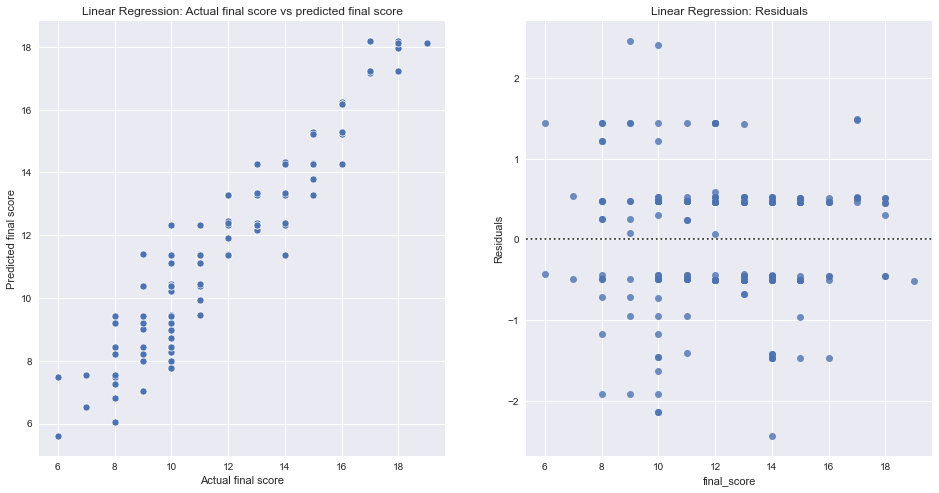

In [ ]:
fig, ax =plt.subplots(figsize=(16,8),nrows=1,ncols=2)

b1 = sns.scatterplot(x=y_test, y=y_pred, ax=ax[0])
b1.set_title('Linear Regression: Actual final score vs predicted final score')
b1.set_xlabel('Actual final score')
b1.set_ylabel('Predicted final score')

b2 = sns.residplot(x=y_test, y=y_pred, ax=ax[1])
b2.set_title('Linear Regression: Residuals')
b2.set_ylabel('Residuals')

plt.show()

The residual plots seem ideal. I am happy with this model. I will now move to more complex models. Let's try KNN.

## k-Nearest Neighbor Regressor

With knn, we will reuse the feature selection process, only the model being used will be a basic knn with 5 neighbors (arbitary choice for neighbors right now).

In [ ]:
# finding optimal number of features to use in the model
# we are using chi-square test from sklearn https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
knn_model = KNeighborsRegressor(n_neighbors=5)

test_mses=[]

for i in range(1,len(X_train.columns)):
    # select k best features
    sk = SelectKBest(chi2, k=i)

    # filter only the k best features
    X_new = sk.fit_transform(X_train,y_train)
    X_new_test=sk.fit_transform(X_test,y_test)

    # fit linear regression on the k best features
    temp_lr = knn_model.fit(X_new, y_train)

    # find mse on the test set
    temp_y_pred = temp_lr.predict(X_new_test)
    test_mse = mean_squared_error(y_test, temp_y_pred)

    # append mse to list
    test_mses.append(test_mse)

# number of features for which mse is lowest
optimal_num_features = np.argmin(test_mses) +1

In [ ]:
temp_column = ['hot','medium','cold']
pd.get_dummies - nominal
temp_column.replace_values({'very cold':0,'cold':1,'medium':2,'hot':3}) - ordinal

In [ ]:
print('The optimal number of features for the knn model are',optimal_num_features)

The optimal number of features for the knn model are 4


In [ ]:
# dataset to use
sk = SelectKBest(chi2, k=optimal_num_features)
X_new = sk.fit_transform(X_train,y_train)
X_new_test=sk.fit_transform(X_test,y_test)

Now we will optimize on a different k: the number of neighbors.

Let's run a grid search on k and find the optimal number of neighbors for the kNN model.

In [ ]:
knn_mse = {}
# running a grid search for k between 1 and 50
for k in range(1,51):

    # defining a knn with k neighbors
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_new, y_train)
    y_pred = knn_model.predict(X_new_test)

    #Storing MSE
    mse = mean_squared_error(y_test,y_pred)
    knn_mse[k] = mse

# value of k for which mse is lowest
optimal_k = np.argmin(list(knn_mse.values())) +1

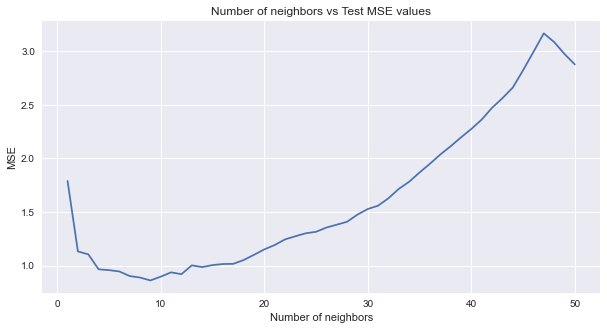

In [ ]:
# k vs mse
plt.figure(figsize=(10,5))
plt.plot(knn_mse.keys(), knn_mse.values())
plt.xlabel('Number of neighbors')
plt.ylabel('MSE')
plt.title('Number of neighbors vs Test MSE values')
plt.show()

Using the elbow method, we chose 8 as our k value. Now running our final knn model:

In [ ]:
# create a knn regressor model
knn_model = KNeighborsRegressor(n_neighbors=8)
# fit on the training data
knn_model.fit(X_new, y_train)
# make predictions on the test set
y_pred = knn_model.predict(X_new_test)

# calculate root mean squared error on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE for KNN Regressor:", rmse)
print("MAE for KNN Regressor:", mae)
print("R-Squared for KNN Regressor:", r2)

RMSE for KNN Regressor: 0.9426054450965303
MAE for KNN Regressor: 0.7173366834170855
R-Squared for KNN Regressor: 0.887785712691113


Again we receive a good R-Squared, slightly lower than linear regression though.

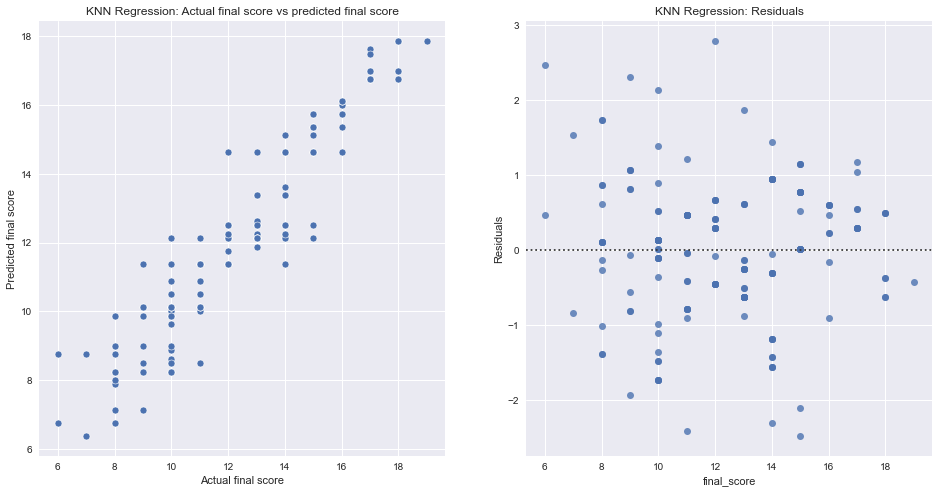

In [ ]:
fig, ax =plt.subplots(figsize=(16,8),nrows=1,ncols=2)

b1 = sns.scatterplot(x=y_test, y=y_pred, ax=ax[0])
b1.set_title('KNN Regression: Actual final score vs predicted final score')
b1.set_xlabel('Actual final score')
b1.set_ylabel('Predicted final score')

b2 = sns.residplot(x=y_test, y=y_pred, ax=ax[1])
b2.set_title('KNN Regression: Residuals')
b2.set_ylabel('Residuals')

plt.show()

## Feature Selection using Random Forest Model

We will now jump to tree models. But before that I will create a standard set of features to use for all the tree based models.

We will use random forest to select our features. This is because each tree of the random forest can calculate the importance of a feature according to its ability to increase the pureness of the leaves. This makes them excellent models for understanding feature importance.

Features that we select using random forest will now be used for all the remaining models.

In [ ]:
# First we build and train our Random Forest Model
# adding an arbitrary amount of trees
# we need to have a good enough number of trees to model the dataset, but not too many
# adding max_depth to avoid overfitting
rf = RandomForestRegressor(max_depth=10, random_state=42, n_estimators = 100).fit(X_train, y_train)

# calculate feature importance
feature_importances = pd.DataFrame(rf.feature_importances_, index =X_train.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances['cummulative_importance'] = feature_importances['importance'].cumsum()
feature_importances

,importance,cummulative_importance
period2_score,0.901942,0.901942
period1_score,0.012079,0.914022
absences,0.009044,0.923065
age,0.005706,0.928772
health,0.005128,0.933899
weekday_alcohol_usage,0.004852,0.938751
family_quality,0.004815,0.943566
go_out,0.004604,0.948170
free_time,0.004477,0.952647
commute_time,0.003902,0.956550


As `period1_score` and `period2_score` have undue advantage in predicting final_score, we will remove them while calculating feature importance and add them back later on

In [ ]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestRegressor(max_depth=10, random_state=42, n_estimators = 100))

X_1 = X_train.drop(['period2_score','period1_score'],axis=1)
sel.fit(X_1, y_train)

selected_feat= list(X_1.columns[(sel.get_support())]) + ['period1_score', 'period2_score']

In [ ]:
print('Final columns selected for use with tree-based models are:',selected_feat)

Final columns selected for use with tree-based models are: ['age', 'mother_education', 'father_education', 'study_time', 'failures', 'free_time', 'go_out', 'weekday_alcohol_usage', 'weekend_alcohol_usage', 'health', 'absences', 'school_support_yes', 'paid_classes_yes', 'desire_higher_edu_yes', 'period1_score', 'period2_score']


In [ ]:
# finalizing training and test set for tree based models
X_train_new = X_train[selected_feat]
X_test_new = X_test[selected_feat]

## Decision Tree Regressor

We will run a decision tree regressor with the default setting, just to get an idea of the accuracy levels

In [ ]:
# create a dTree regressor model
dTree = DecisionTreeRegressor(random_state=1)
# fit on the training data
dTree.fit(X_train_new, y_train)
# make predictions on the test set
y_pred = dTree.predict(X_test_new)

# calculate root mean squared error on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE for dTree Regressor:", rmse)
print("MAE for dTree Regressor:", mae)
print("R-Squared for dTree Regressor:", r2)

RMSE for dTree Regressor: 1.205098048514171
MAE for dTree Regressor: 0.9095477386934674
R-Squared for dTree Regressor: 0.816585767226478


Not bad. Let's try hyperparameter optimization using grid search and see where we can take this model.

First we will define the grid.

In [ ]:
4*14*9*9

4536

In [ ]:
# parameters for grid search dTree
param_dict = {
    "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth":range(1,15),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

In [ ]:
grid_dtree = GridSearchCV(DecisionTreeRegressor(), param_dict,verbose=1,scoring='r2',n_jobs=1)
grid_dtree.fit(X_train_new,y_train)
grid_dtree.best_params_

Now we will use these hyperparameters and fit the final dTree Model.

In [ ]:
# create a dTree regressor model
dTree = DecisionTreeRegressor(criterion='squared_error',max_depth=4,min_samples_leaf=9,min_samples_split=2,random_state=1)
# fit on the training data
dTree.fit(X_train_new, y_train)
# make predictions on the test set
y_pred = dTree.predict(X_test_new)

# calculate root mean squared error on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE for dTree Regressor:", rmse)
print("MAE for dTree Regressor:", mae)
print("R-Squared for dTree Regressor:", r2)

We receive our best ever R-Squared so far of 0.91

In [ ]:
fig, ax =plt.subplots(figsize=(16,8),nrows=1,ncols=2)

b1 = sns.scatterplot(x=y_test, y=y_pred, ax=ax[0])
b1.set_title('dTree Regression: Actual final score vs predicted final score')
b1.set_xlabel('Actual final score')
b1.set_ylabel('Predicted final score')

b2 = sns.residplot(x=y_test, y=y_pred, ax=ax[1])
b2.set_title('dTree Regression: Residuals')
b2.set_ylabel('Residuals')

plt.show()

We can also look at the importance of the features using the trained decision tree model. Let's look at the five most important features according to our decision tree model.

In [ ]:
# Importance calculation
pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train_new.columns).sort_values(by="Imp",ascending=False).head()

Interestingly, number of failures seem to be an important factor as well.

## RandomForest Regressor

Now, we will use Random Forest to model our dataset. We will now optimize the hyper-parameters.

As Random Forest take considerable time to train, we will run a Randomized Search instead of a grid search for hyper-parameter tuning. Let's define the parameters that will be considered.

In [ ]:
# parameters for grid search dTree
param_dict = {
    "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth":range(1,15),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 30)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 80, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_model = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 500, cv = 5, verbose=20, random_state=42, n_jobs = 1,scoring='r2')
rf_random.fit(X_train_new, y_train)
print(rf_random.best_params_)

In [ ]:
# create a random forest regressor model
rf_model = RandomForestRegressor(n_estimators=90,
                                 max_depth=5,
                                 min_samples_leaf=4,
                                 min_samples_split=5,
                                 max_features='auto',
                                 bootstrap=True,
                                 random_state=1)
# fit on the training data
rf_model.fit(X_train_new, y_train)
# make predictions on the test set
y_pred = rf_model.predict(X_test_new)

# calculate root mean squared error on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE for Random Forest Regressor:", rmse)
print("MAE for Random Forest Regressor:", mae)
print("R-Squared for Random Forest Regressor:", r2)

RMSE for Random Forest Regressor: 0.8125775380679985
MAE for Random Forest Regressor: 0.6502622099198602
R-Squared for Random Forest Regressor: 0.9166092474278689


We improve our R-Squared even further to 0.9167. Let's look at the residual plots:

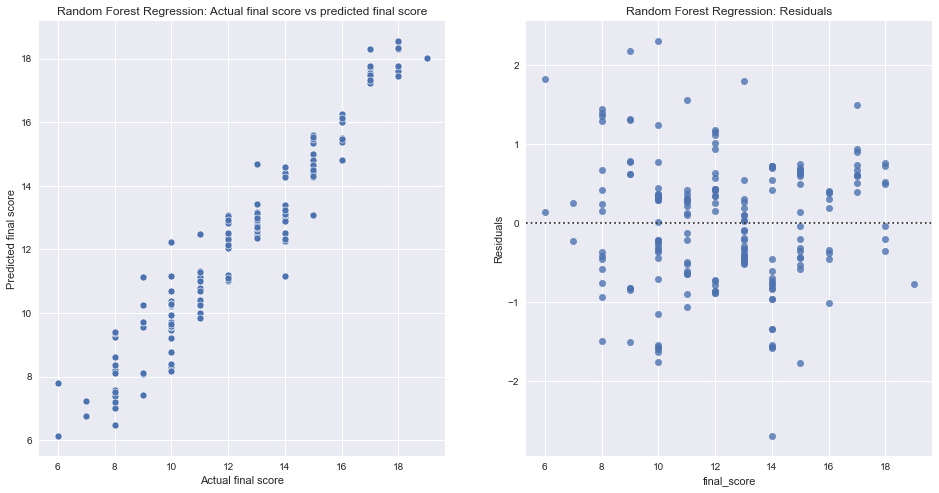

In [ ]:
fig, ax =plt.subplots(figsize=(16,8),nrows=1,ncols=2)

b1 = sns.scatterplot(x=y_test, y=y_pred, ax=ax[0])
b1.set_title('Random Forest Regression: Actual final score vs predicted final score')
b1.set_xlabel('Actual final score')
b1.set_ylabel('Predicted final score')

b2 = sns.residplot(x=y_test, y=y_pred, ax=ax[1])
b2.set_title('Random Forest Regression: Residuals')
b2.set_ylabel('Residuals')
plt.savefig('random_forest_accuracy.png')
plt.show()

Five most important features according to the Random Forest model:

In [ ]:
# Importance calculation for Random Forest
pd.DataFrame(rf_model.feature_importances_, columns = ["Imp"], index = X_train_new.columns).sort_values(by="Imp",ascending=False).head()

# Ada Boost Regressor

As tree-based ensemble models are doing well, let's try Ada Boost. Let's run a grid search to optimize on the hyper-parameters.

In [ ]:
ada_boost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[i for i in range(4,14,2)],
              'n_estimators':[50,100,250,300,350],
              'learning_rate':[0.01, 0.025, 0.05, 0.075, 0.1],
              'base_estimator__max_features':['auto']
             }

ada_boost_grid = GridSearchCV(ada_boost_model, parameters,verbose=100,scoring='r2',n_jobs=1)
ada_boost_grid.fit(X_train,y_train)
ada_boost_grid.best_params_

We will now use the best parameters received to create our final ada boost model and report the accuracies.

In [ ]:
ada_boost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth = 6,
                                                                         min_samples_leaf = 10,
                                                                         max_features='auto'),
                                   learning_rate=0.075,
                                   n_estimators=300)

# fit on the training data
ada_boost_model.fit(X_train_new, y_train)
# make predictions on the test set
y_pred = ada_boost_model.predict(X_test_new)

# calculate root mean squared error on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# calculate mean absolute error on test set
mae = mean_absolute_error(y_test, y_pred)

# calculate r2-squared on test set
r2 = r2_score(y_test, y_pred)

print("RMSE for AdaBoost Regressor:", rmse)
print("MAE for AdaBoost Regressor:", mae)
print("R-Squared for AdaBoost Regressor:", r2)

AdaBoost performed well but not as well as Random Forest. We received a R-Square of 0.906

In [ ]:
fig, ax =plt.subplots(figsize=(16,8),nrows=1,ncols=2)

b1 = sns.scatterplot(x=y_test, y=y_pred, ax=ax[0])
b1.set_title('AdaBoost Regression: Actual final score vs predicted final score')
b1.set_xlabel('Actual final score')
b1.set_ylabel('Predicted final score')

b2 = sns.residplot(x=y_test, y=y_pred, ax=ax[1])
b2.set_title('AdaBoost Regression: Residuals')
b2.set_ylabel('Residuals')

plt.show()

Let's move to our final ensemble model XGBoost Regressor

# XG Boost Regressor

Let's try XGBoost Regressor now. First we will do hyperparameter optimization.

In [ ]:
## Hyper Parameter Optimization
n_estimators = [100, 200, 300, 400,500]
max_depth = [2, 3, 5, 10, 15]
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    "gamma": np.linspace(0, 5,10),
    "eta":np.linspace(0.1,0.3,10)
    }

# Set up the random search with 5-fold cross validation
random_xgb = RandomizedSearchCV(estimator=xgb.XGBRegressor(),
            param_distributions=hyperparameter_grid,
            cv=5,
            n_iter=100,
            scoring = 'neg_mean_absolute_error',
            n_jobs = 4,
            verbose = 100,
            return_train_score = True,
            random_state=42)

random_xgb.fit(X_train_new,y_train)
print(random_xgb.best_params_)

In [ ]:
# the optimized model
xgb_reg = xgb.XGBRegressor(n_estimators=400, eta=0.18, max_depth=2, gamma=3.89,
                           min_child_weight=4, learning_rate=0.2)
xgb_reg.fit(X_train_new, y_train)

# fit on the training data
xgb_reg.fit(X_train_new, y_train)

# make predictions on the test set
y_pred = xgb_reg.predict(X_test_new)

# calculate root mean squared error on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# calculate mean absolute error on test set
mae = mean_absolute_error(y_test, y_pred)

# calculate r2-squared on test set
r2 = r2_score(y_test, y_pred)

print("RMSE for XGBoost Regressor:", rmse)
print("MAE for XGBoost Regressor:", mae)
print("R-Squared for XGBoost Regressor:", r2)

XGBoost gave us a very good accuracy but considering the time it takes to train and factors like interpretability of the features, I will prefer Random Forest.

In [ ]:
fig, ax =plt.subplots(figsize=(16,8),nrows=1,ncols=2)

b1 = sns.scatterplot(x=y_test, y=y_pred, ax=ax[0])
b1.set_title('XGBoost Regression: Actual final score vs predicted final score')
b1.set_xlabel('Actual final score')
b1.set_ylabel('Predicted final score')

b2 = sns.residplot(x=y_test, y=y_pred, ax=ax[1])
b2.set_title('XGBoost Regression: Residuals')
b2.set_ylabel('Residuals')

plt.show()

These were all the models that we use. Let's compare their performance now.

# Evaluation

Here are the testing accuracies for all the 6 hyper-parameter tuned models and the baseline dummy model. We tested each one 5 times(5 different samples of testing set) and presented the mean accuracy metrics for all of these models.

| ![model_accuracies.jpg](img/model_accuracies.jpg) |
|:--:|
| <b>Fig.2 Mean Accuracy Metrics for all of our ML models
  </b>|

The best accuracy was received with the Random Forest Model. Random Forest are excellent for analysis as they are very robust models and also help provide key insights from the model.

For example, Random Forest gave us the subset of features that are most useful in predicting student's final score. These are:
1. `study_time`
2. `mother_education`
3. `father_education`
4. `failures`
5. `free_time`
6. `go_out`
7. `weekday_alcohol_usage`
8. `weekend_alcohol_usage`
9. `health`
10. `absences`
11. `school_support`
12. `paid_classes`
13. `desire_higher_edu`
14. `period1_score`
15. `period2_score`
16. `age`

# Conclusion

Student's academic success is usually thought to be dependent on student's dedication and hardwork. This analyses pointed out that while those parameters are important, there are other background factors that impact student's final score.

The Exploratory Data Analysis revealed many interesting ideas from the data such as:
1. Father's education status seems to be more relevant to student's success.
2. Students living with both their parents or stable households seem to be perform better.
3. Students who wish to go for higher education perform better in school.
4. Increased commute time has a negative impact on academic performance.

These are just some of the insights that were found in the data. These ideas were than supported by the machine learning modeling stage which showed that the same features were important for predicting final score.

We selected Random Forest Regressor as our final model where we received a mean R-Squared of 0.92.

# Future Scope

While we have covered a lot of bases in this analysis, more can be done to improve the analysis further.

It would be interesting to implement an online system where we look at these factors while a student is studying and then conduct experiments to see, if additional school support can help students who are predicted to perform poorly.

Many of the analyses presented in this report can be used as guidelines and recommendations for school districts. For example, providing students, who don't have access to internet at home, with mobile hotspots.

We can also study school dropouts in more details and analyze the factors that cause dropout in more detail.

In the next iteration, we would also like to deploy our ML model as web application which is integrated with the school district rostering systems. This will allow for schools to continuously monitor the progress of its students and take corrective measures if required.